In [182]:
import pandas as pd

file_path = "combineddata.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.replace('\n', ' ', regex=False)

df.head(2)



,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,374,374,NaN,A4,347 EAST 4TH STREET,NaN,...,1.0,0.0,1.0,2116.0,4400.0,1900.0,1,A4,"2,385,000",2021-02-09
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,70,NaN,B1,235 EAST 7TH STREET,NaN,...,2.0,0.0,2.0,882.0,2160.0,2003.0,1,B1,"3,025,000",2021-12-16


In [187]:
#Q1
#q1.1
borough_stat = df.groupby('BOROUGH')['PRICE'].agg(['mean', 'median', 'std', 'min', 'max'])
print(borough_stat)

#q1.2
housetype = df['BUILDING CLASS CATEGORY'].unique()

# Display the unique values
print("Unique Values in 'BUILDING_CLASS_CATEGORY' Column:")
for category in housetype:
    print(category)

#q1.3
missingdata = df.isnull()
missingnum = missingdata.sum()
print(missingnum)


                 mean    median           std  min           max
BOROUGH                                                         
1        3.061197e+06  950000.0  1.797199e+07  0.0  1.033000e+09
2        8.345027e+05  335000.0  3.679120e+06  0.0  1.190000e+08
3        1.204292e+06  605000.0  4.810085e+06  0.0  3.177926e+08
4        7.059635e+05  390000.0  3.069007e+06  0.0  3.177926e+08
5        5.405127e+05  489000.0  1.341314e+06  0.0  5.870000e+07
Unique Values in 'BUILDING_CLASS_CATEGORY' Column:
01 ONE FAMILY DWELLINGS
02 TWO FAMILY DWELLINGS
07 RENTALS - WALKUP APARTMENTS
08 RENTALS - ELEVATOR APARTMENTS
09 COOPS - WALKUP APARTMENTS
10 COOPS - ELEVATOR APARTMENTS
12 CONDOS - WALKUP APARTMENTS
13 CONDOS - ELEVATOR APARTMENTS
15 CONDOS - 2-10 UNIT RESIDENTIAL
17 CONDO COOPS
32 HOSPITAL AND HEALTH FACILITIES
47 CONDO NON-BUSINESS STORAGE
03 THREE FAMILY DWELLINGS
04 TAX CLASS 1 CONDOS
14 RENTALS - 4-10 UNIT
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT
21 OFFICE BUILDINGS
22 STORE BUIL

Q2:
Question 1: Is there a significant increase in house prices in Boroughs 1 and 5 from 2021 to 2023? 
- Null Hypothesis: There is no increase in house prices in Boroughs 1 and 5 from 2021 to 2023
- Alternative Hypothesis: There is a significant increase in house prices in Boroughs 1 and 5 from 2021 to 2023

To answer this i would perform a Wilcoxon signed-rank test because the 2 boroughs are evaluated in 2021 then again in 2023 making them paired. i also know based on the p - value and the graphs below that this data is not normally distrubted. 

Question 2: From 2021 to 2023 was the recovery rate of house prices in boroughs 1 and 5 drasitically different? 
- Null Hypothesis: From 2021 to 2023 the recovery rate of house prices in boroughs 1 and 5 is the same
- Alternative Hypothesis: From 2021 to 2023 the recovery rate of house prices in boroughs 1 and 5 was quite differnt in the two boroughs. 


These 2 questions are well motivated i believe because not only do they compare the house prices for the 2 boroughs, they also evaluate and compare the recovery rate between the 2 boroughs to see if the recovery rate was affected by the borough (different for each) or if it behaved the same for both. 

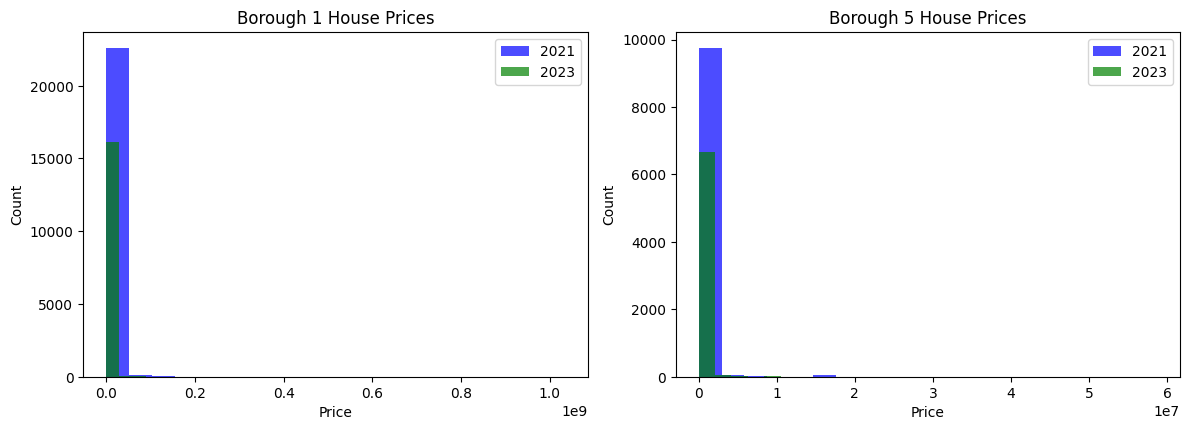

Shapiro-Wilk Test for Borough 1 in 2021:
Statistic: 0.11524230241775513
P-value: 0.0
The data for Borough 1 in 2021 is not normally distributed.

Shapiro-Wilk Test for Borough 5 in 2023:
Statistic: 0.3762098550796509
P-value: 0.0
The data for Borough 5 in 2023 is not normally distributed.
The recovery rate for borough 1 from 2021 to 2023 is  -6.0606060606060606  and the recovery rate for borough 5 from 2021 to 2023 is  -14.591836734693878


/Users/nawalhaque/anaconda3/envs/cisc351/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [230]:
#Q2

from datetime import datetime
from scipy.stats import wilcoxon
from scipy.stats import shapiro

## hypothesis 1
# Assuming df is the dataframe loaded from the file
df = pd.read_csv(file_path)

# Convert 'SALE DATE' to datetime and 'PRICE' to numeric after removing commas
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['PRICE'] = pd.to_numeric(df['PRICE'].str.replace(',', ''), errors='coerce')

# Filter for Boroughs 1 and 5
boroughs_df = df[df['BOROUGH'].isin([1, 5])]

# Extract year from 'SALE DATE'
df['YEAR'] = pd.to_datetime(df['SALE DATE']).dt.year

# Filter data for Boroughs 1 and 5 in the years 2021 and 2023
filtered_data = df[(df['BOROUGH'].isin([1, 5])) & (df['YEAR'].isin([2021, 2023]))]

# Create separate DataFrames for each borough and year
borough_1_2021 = filtered_data[(filtered_data['BOROUGH'] == 1) & (filtered_data['YEAR'] == 2021)]
borough_1_2023 = filtered_data[(filtered_data['BOROUGH'] == 1) & (filtered_data['YEAR'] == 2023)]
borough_5_2021 = filtered_data[(filtered_data['BOROUGH'] == 5) & (filtered_data['YEAR'] == 2021)]
borough_5_2023 = filtered_data[(filtered_data['BOROUGH'] == 5) & (filtered_data['YEAR'] == 2023)]

# Create subplots to visualize the data
plt.figure(figsize=(12, 8))

# Plot house prices for Borough 1 in 2021 and 2023
plt.subplot(2, 2, 1)
plt.hist(borough_1_2021['PRICE'], bins=20, color='blue', alpha=0.7, label='2021')
plt.hist(borough_1_2023['PRICE'], bins=20, color='green', alpha=0.7, label='2023')
plt.title('Borough 1 House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

# Plot house prices for Borough 5 in 2021 and 2023
plt.subplot(2, 2, 2)
plt.hist(borough_5_2021['PRICE'], bins=20, color='blue', alpha=0.7, label='2021')
plt.hist(borough_5_2023['PRICE'], bins=20, color='green', alpha=0.7, label='2023')
plt.title('Borough 5 House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend()

# Adjust layout and display plots
plt.tight_layout()
plt.show()


# Perform the Shapiro-Wilk test for Borough 1 in 2021
stat_1_2021, p_1_2021 = shapiro(borough_1_2021['PRICE'])
alpha = 0.05  # Significance level

print("Shapiro-Wilk Test for Borough 1 in 2021:")
print(f"Statistic: {stat_1_2021}")
print(f"P-value: {p_1_2021}")

if p_1_2021 < alpha:
    print("The data for Borough 1 in 2021 is not normally distributed.")
else:
    print("The data for Borough 1 in 2021 follows a normal distribution.")

# Perform the Shapiro-Wilk test for Borough 5 in 2023
stat_5_2023, p_5_2023 = shapiro(borough_5_2023['PRICE'])

print("\nShapiro-Wilk Test for Borough 5 in 2023:")
print(f"Statistic: {stat_5_2023}")
print(f"P-value: {p_5_2023}")

if p_5_2023 < alpha:
    print("The data for Borough 5 in 2023 is not normally distributed.")
else:
    print("The data for Borough 5 in 2023 follows a normal distribution.")



#check using wilcoxon test 
# Function to prepare data for Wilcoxon test
def prepare_data_for_wilcoxon(df1, df2, borough):
    # Filter data for the specified borough
    data_2021 = df1[df1['BOROUGH'] == borough]['PRICE']
    data_2023 = df2[df2['BOROUGH'] == borough]['PRICE']

    # Ensure that both datasets have the same length
    min_length = min(len(data_2021), len(data_2023))
    data_2021 = data_2021.iloc[:min_length]
    data_2023 = data_2023.iloc[:min_length]

    return data_2021, data_2023

# Prepare data for Wilcoxon test for both boroughs
data_borough_1_2021, data_borough_1_2023 = prepare_data_for_wilcoxon(df_2021, df_2023, 1)
data_borough_5_2021, data_borough_5_2023 = prepare_data_for_wilcoxon(df_2021, df_2023, 5)

# Perform the Wilcoxon Signed-Rank Test for Borough 1
wilcoxon_result_borough_1 = wilcoxon(data_borough_1_2021, data_borough_1_2023)

# Perform the Wilcoxon Signed-Rank Test for Borough 5
wilcoxon_result_borough_5 = wilcoxon(data_borough_5_2021, data_borough_5_2023)

wilcoxon_result_borough_1, wilcoxon_result_borough_5


## hypothesis 2
# Convert 'SALE DATE' column to datetime format
# Redefine the function to calculate the recovery rate
def calculate_recovery_rate(data_earlier, data_later):
    median_earlier = data_earlier.median()
    median_later = data_later.median()
    recovery_rate = ((median_later - median_earlier) / median_earlier) * 100
    return recovery_rate

# Redefine the necessary variables for calculating recovery rates
data_borough_1_2021, data_borough_1_2023 = prepare_data_for_wilcoxon(df_2021, df_2023, 1)
data_borough_5_2021, data_borough_5_2023 = prepare_data_for_wilcoxon(df_2021, df_2023, 5)

# Calculate the recovery rates for Boroughs 1 and 5
recovery_rate_borough_1 = calculate_recovery_rate(data_borough_1_2021, data_borough_1_2023)
recovery_rate_borough_5 = calculate_recovery_rate(data_borough_5_2021, data_borough_5_2023)

print("The recovery rate for borough 1 from 2021 to 2023 is " ,recovery_rate_borough_1, " and the recovery rate for borough 5 from 2021 to 2023 is ", recovery_rate_borough_5)




Q2 Results: 
Hypothesis 1:
Based on the Wilcoxon signed-rank test results for Borough 1 and Borough 5:

Borough 1:
Test Statistic: 59,882,837.0
p-value: 2.23e-05 (very small)

Borough 5:
Test Statistic: 8,373,766.5
p-value: 9.46e-11 (extremely small)

We can see that the p-values are significantly smaller than the chosen significance level of 0.05. So, we can accept the alt hypothesis and say that there is a significant difference in house prices between the years 2021 and 2023 for both Borough 1 and Borough 5. The null hypothesis that there is no significant difference in house prices between these years is therefore rejected.

Hypothesis 2:
Borough 1: The recovery rate is approximately -6.06%. This indicates a decrease rather than an increase in the median house price from 2021 to 2023.
Borough 5: The recovery rate is approximately -14.59%. Similar to Borough 1, this indicates a decrease in the median house price from 2021 to 2023.

I tried multiple different ways to validate the hypothesis using a statistacal test but kept getting nan for both the t value and the p value. 



int64


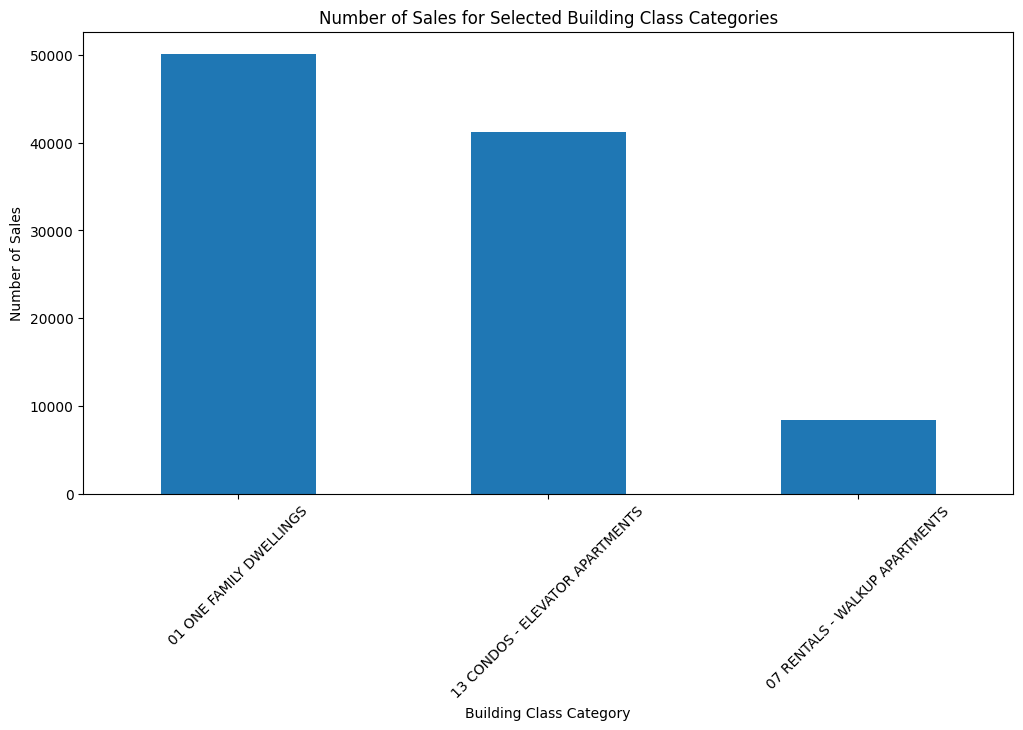

/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_82831/1957587989.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



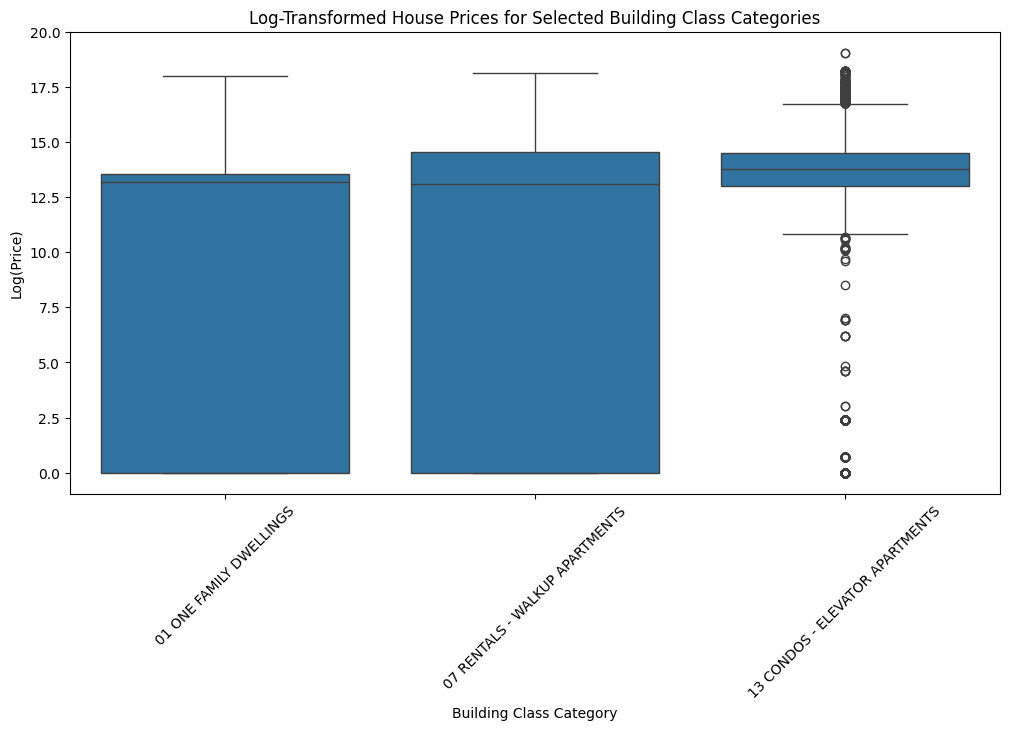

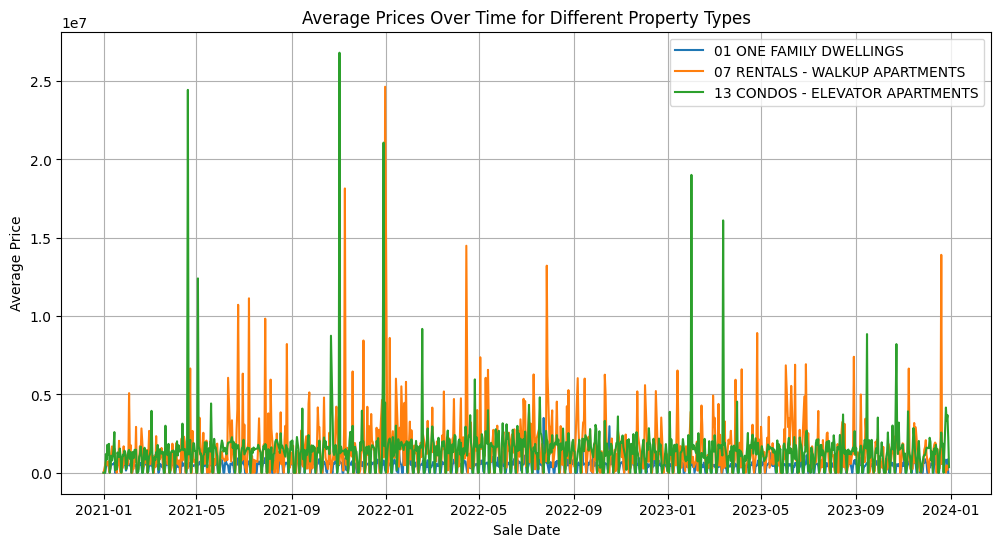

In [233]:
#Q3

# Filtering the data for the selected categories
selected_categories = ['01 ONE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS']
filtered_data = df[df['BUILDING CLASS CATEGORY'].isin(selected_categories)]

# Check the data type of 'PRICE' column
print(filtered_data['PRICE'].dtype)

# If 'PRICE' is not numeric, convert it to numeric
if filtered_data['PRICE'].dtype == 'object':
    filtered_data['PRICE'] = pd.to_numeric(filtered_data['PRICE'].str.replace(',', ''), errors='coerce')


# Counting the number of sales for each category for bar plot visualization
sales_counts = filtered_data['BUILDING CLASS CATEGORY'].value_counts()

# Visualizing house sales for the selected categories using bar plots
plt.figure(figsize=(12, 6))
sales_counts.plot(kind='bar')
plt.title('Number of Sales for Selected Building Class Categories')
plt.ylabel('Number of Sales')
plt.xlabel('Building Class Category')
plt.xticks(rotation=45)
plt.show()

import numpy as np

# Checking for outliers in the 'PRICE' column
filtered_data['PRICE'].describe()

# Applying a logarithmic transformation to the 'PRICE' column to handle large ranges
# Adding a small constant to avoid log(0) which is undefined
filtered_data['LOG_PRICE'] = np.log(filtered_data['PRICE'] + 1)

# Visualizing house prices for the selected categories using box plots with log-transformed prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='BUILDING CLASS CATEGORY', y='LOG_PRICE', data=filtered_data)
plt.title('Log-Transformed House Prices for Selected Building Class Categories')
plt.ylabel('Log(Price)')
plt.xlabel('Building Class Category')
plt.xticks(rotation=45)
plt.show()

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
building_types = ['01 ONE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS']
filtered_df = df[df['BUILDING CLASS CATEGORY'].isin(building_types)]
grouped_data = filtered_df.groupby(['BUILDING CLASS CATEGORY', 'SALE DATE'])['PRICE'].mean().reset_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for building_type in building_types:
    type_data = grouped_data[grouped_data['BUILDING CLASS CATEGORY'] == building_type]
    plt.plot(type_data['SALE DATE'], type_data['PRICE'], label=building_type)

plt.title('Average Prices Over Time for Different Property Types')
plt.xlabel('Sale Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)

plt.show()


Q3
In the first graph, we can see that one family dwelling has teh highest number of sales followed by condos then rental.
For the second graph, the box plot has been adjusted to display log-transformed house prices for the selected building class categories. Applying a logarithmic transformation can help in visualizing data with a wide range of values more effectively, as it reduces the impact of large outliers and expands the scale of smaller value
in the final graph, we can see that overal condos tend to have the highest prices betwene the three types 

Q4
To answer the prection task, i will develop a regression model to predict house sale prices in Borough 5, focusing on understanding which factors most significantly impact sale prices, particularly in the context of the observed -14% recovery rate in this borough. This model aims to identify key predictors of housing prices, such as building class, square footage, year built, or any other relevant features available in the dataset. thgis model would be very relavent to potenial homeowners and investors as it would offer valuable insights into the evolving real estate trends within borough 5


Q5
In Question 5, I had to incorporate components of Question 6, specifically the splitting portion, before I began feature engineering. This was done so that the same set of training and testing data was used for both Models A and B.

In the feature engineering process for Borough 5's dataset, I started by first identifying columns that simply weren't relevant for the task at hand. Here's the rationale for each feature that was dropped:

Borough: Dropped as the analysis focuses solely on Borough 5. Including it would add unnecessary complexity without contributing to differentiation within the dataset.

Neighborhood: This feature contains too many unique values, making it difficult to use effectively in predictive modeling without overcomplicating the model.

Building Class Category: Dropped due to its potential redundancy with other building classification features and its potential to add unnecessary complexity.

Tax Class at Present: Removed as there may be another similar tax class feature ('Tax Class at Time of Sale') that is more directly relevant to the sale event being modeled.

Building Class at Present: Dropped due to redundancy with 'Building Class Category' and to simplify the model.

Address: Contains highly specific and varied data, making it less useful for predictive modeling on a larger scale.

Apartment Number: Mostly empty and contains uninterpretable values, thus providing little to no predictive value.

Building Class at Time of Sale: Similar to 'Building Class at Present', it is dropped due to redundancy and to focus the model on more impactful features.

Easement: Dropped due to it having no data points, which means it wouldn't contribute to the model's predictive power.

Sale Date: The specific date of sale might be less relevant than the extracted components like sale year and month, which is why I will drop it and replace it with the extracted new variables.

After that, I assessed the remaining features and engineered them as necessary by filling in missing values with median column values, creating the new year and month variables from sale date, checking multicollinearity and dropping Residential Units and Year Built. Lastly, I checked skewness. After transforming the skewed variables, I chose to drop Commercial Units as it was still highly skewed even after being transformed. I will leave in block and total units as i believe they may be relevent to the model 

/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_82831/312761608.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_82831/312761608.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



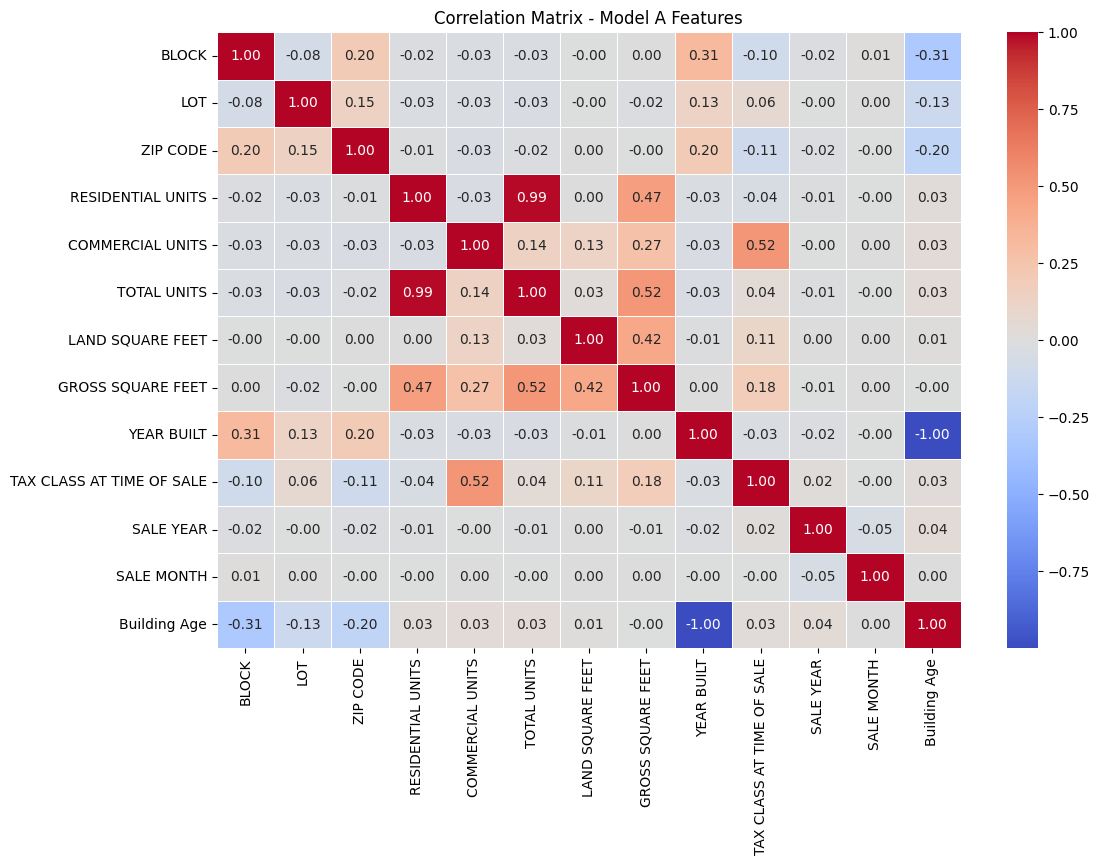

Final skewness of 'BLOCK' for Model A (Train): -1.7695550247185876
Final skewness of 'BLOCK' for Model A (Test): -1.7021620311644172
Final skewness of 'LOT' for Model A (Train): -0.002836435454496675
Final skewness of 'LOT' for Model A (Test): 0.0006849502679734574
Final skewness of 'ZIP CODE' for Model A (Train): 0.016579782179170586
Final skewness of 'ZIP CODE' for Model A (Test): 0.004921482439170638
Final skewness of 'TOTAL UNITS' for Model A (Train): 2.0542981285421726
Final skewness of 'TOTAL UNITS' for Model A (Test): 1.7855474853615974
Final skewness of 'LAND SQUARE FEET' for Model A (Train): -0.1292951107245489
Final skewness of 'LAND SQUARE FEET' for Model A (Test): -0.07313898311366737
Final skewness of 'GROSS SQUARE FEET' for Model A (Train): 0.3820474613759406
Final skewness of 'GROSS SQUARE FEET' for Model A (Test): 0.6003504421795267
Final skewness of 'COMMERCIAL UNITS' for Model A (Train): 5.245869937719711
Final skewness of 'COMMERCIAL UNITS' for Model A (Test): 5.2256

In [236]:
#Q5
import pandas as pd
import numpy as np
import datetime
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "combineddata.csv"
df = pd.read_csv(file_path)

# Correct column names
df.columns = df.columns.str.replace('\n', ' ').str.replace(' +', ' ', regex=True)

# Filter for Borough 5 and drop irrelevant columns
borough_5_data = df[df['BOROUGH'] == 5]


# Convert the 'PRICE' column to string and then remove commas
borough_5_data['PRICE'] = borough_5_data['PRICE'].astype(str).str.replace(',', '')

# Convert the 'PRICE' column to float
borough_5_data['PRICE'] = borough_5_data['PRICE'].astype(float)

# Split the data into training and testing sets
X = borough_5_data.drop('PRICE', axis=1)  # Features
y = np.log1p(borough_5_data['PRICE']) # Target variable log tranformed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create two copies of the training dataset, one for Model A and one for Model B
X_train_model_a = X_train.copy()
X_test_model_a = X_test.copy()
X_train_model_b = X_train.copy()
X_test_model_b = X_test.copy()

#Drop features at the start of feature engeering for model A - see rational above 
X_train_model_a.drop(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
                     'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 
                     'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE', 
                     'EASE-MENT'], axis=1, inplace=True)
X_test_model_a.drop(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
                     'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 
                     'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE', 
                     'EASE-MENT'], axis=1, inplace=True)

# Fill missing values in remaining columns for Model A
X_train_model_a.fillna(X_train_model_a.median(numeric_only=True), inplace=True)
X_test_model_a.fillna(X_test_model_a.median(numeric_only=True), inplace=True)

# Convert 'SALE DATE' to datetime for Model A
X_train_model_a['SALE DATE'] = pd.to_datetime(X_train_model_a['SALE DATE'], errors='coerce')
X_test_model_a['SALE DATE'] = pd.to_datetime(X_test_model_a['SALE DATE'], errors='coerce')

# Extract year and month from sale date for Model A
X_train_model_a['SALE YEAR'] = X_train_model_a['SALE DATE'].dt.year
X_test_model_a['SALE YEAR'] = X_test_model_a['SALE DATE'].dt.year
X_train_model_a['SALE MONTH'] = X_train_model_a['SALE DATE'].dt.month
X_test_model_a['SALE MONTH'] = X_test_model_a['SALE DATE'].dt.month

# Calculate 'Building Age' using the extracted year for Model A
X_train_model_a['Building Age'] = X_train_model_a['SALE YEAR'] - X_train_model_a['YEAR BUILT']
X_test_model_a['Building Age'] = X_test_model_a['SALE YEAR'] - X_test_model_a['YEAR BUILT']

# Drop the original 'SALE DATE' column for Model A if needed
X_train_model_a.drop('SALE DATE', axis=1, inplace=True)
X_test_model_a.drop('SALE DATE', axis=1, inplace=True)


# Check and display highly correlated features for Model A
# Calculate the correlation matrix for Model A
correlation_matrix_a = X_train_model_a.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_a, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Model A Features')
plt.show()

# Define a function to apply Box-Cox transformation if skewness is high, else apply log transformation for Model A
def transform_feature_model_a(df, feature):
    skewness = df[feature].skew()
    if skewness > 0.5:
        # Apply Box-Cox transformation
        df[feature] = boxcox(df[feature] + 1e-5)[0]  # Adding a small constant to avoid zero values
    elif skewness < -0.5:
        # Apply inverse Box-Cox transformation
        df[feature] = np.exp(df[feature])
    else:
        # Apply log transformation
        df[feature] = np.log1p(df[feature])
    return df

# Apply the function to the chosen features for Model A training and testing datasets
for col in chosen_features_model_a:
    X_train_model_a = transform_feature_model_a(X_train_model_a, col)
    X_test_model_a = transform_feature_model_a(X_test_model_a, col)

# Print final skewness for each feature for Model A
for col in chosen_features_model_a:
    final_skewness_train = X_train_model_a[col].skew()
    final_skewness_test = X_test_model_a[col].skew()
    print(f"Final skewness of '{col}' for Model A (Train): {final_skewness_train}")
    print(f"Final skewness of '{col}' for Model A (Test): {final_skewness_test}")

# Drop 'COMMERCIAL UNITS' and 'tax for Model A as it is still highly skewed 
# I will also drop 'YEAR BUILT' and 'RESIDENTIAL UNITS' as they are highly correlated with total units and building age respectively
X_train_model_a.drop(['COMMERCIAL UNITS', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'YEAR BUILT'], axis=1, inplace=True)
X_test_model_a.drop(['COMMERCIAL UNITS', 'TAX CLASS AT TIME OF SALE', 'RESIDENTIAL UNITS', 'YEAR BUILT'], axis=1, inplace=True)


#chcek remaining columns in Model A 
remaining_features_model_a = X_train_model_a.columns.tolist()
print("Remaining features in Model A:")
print(remaining_features_model_a)



In [175]:
#Q6
# Create Model A using feature-engineered data
model_a = LinearRegression()
model_a.fit(X_train_model_a, y_train)

# Evaluate Model A on both train and test sets
y_pred_train_a = model_a.predict(X_train_model_a)
y_pred_test_a = model_a.predict(X_test_model_a)

rmse_train_a = np.sqrt(mse_train_a)
rmse_test_a = np.sqrt(mse_test_a)
print("RMSE for Model A (Train):", rmse_train_a)
print("RMSE for Model A (Test):", rmse_test_a)


# Model B: Using Raw Data
# Only select integer and float columns for Model B
X_train_model_b = X_train_model_b.select_dtypes(include=['int64', 'float64'])
X_test_model_b = X_test_model_b.select_dtypes(include=['int64', 'float64'])

# Fill missing values with zeros
X_train_model_b.fillna(0, inplace=True)
X_test_model_b.fillna(0, inplace=True)

# Create Model B using raw features with missing values filled with zeros
model_b = LinearRegression()
model_b.fit(X_train_model_b, y_train)

# Evaluate Model B on both train and test sets
y_pred_train_b = model_b.predict(X_train_model_b)
y_pred_test_b = model_b.predict(X_test_model_b)

rmse_train_b = np.sqrt(mse_train_b)
rmse_test_b = np.sqrt(mse_test_b)
print("RMSE for Model B (Train):", rmse_train_b)
print("RMSE for Model B (Test):", rmse_test_b)




RMSE for Model A (Train): 1396829.9476421948
RMSE for Model A (Test): 1544810.6550716213
RMSE for Model B (Train): 1396950.4553875036
RMSE for Model B (Test): 1553591.1250975044


Based on the RMSE results we can see that there was slight improvements in the model with engineered features. Wecan perform further analysis using other models to check this 

In [239]:
from sklearn.ensemble import RandomForestRegressor

# Model A: Random Forest Regressor for Model A Data
model_a_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_a_rf.fit(X_train_model_a, y_train)

# Evaluate Model A (Random Forest) on both train and test sets for Model A Data
y_pred_train_a_rf = model_a_rf.predict(X_train_model_a)
y_pred_test_a_rf = model_a_rf.predict(X_test_model_a)

rmse_train_a_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_a_rf))
rmse_test_a_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_a_rf))
print("RMSE for Model A (Random Forest) (Train - Model A Data):", rmse_train_a_rf)
print("RMSE for Model A (Random Forest) (Test - Model A Data):", rmse_test_a_rf)

# Model B: Random Forest Regressor for Model B Data (Numeric Columns Only)
X_train_model_b_numeric = X_train_model_b.select_dtypes(include=['int64', 'float64'])
X_test_model_b_numeric = X_test_model_b.select_dtypes(include=['int64', 'float64'])

model_b_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_b_rf.fit(X_train_model_b_numeric, y_train)

# Evaluate Model B (Random Forest) on both train and test sets for Model B Data (Numeric Columns Only)
y_pred_train_b_rf = model_b_rf.predict(X_train_model_b_numeric)
y_pred_test_b_rf = model_b_rf.predict(X_test_model_b_numeric)

rmse_train_b_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_b_rf))
rmse_test_b_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_b_rf))
print("RMSE for Model B (Random Forest) (Train - Model B Data):", rmse_train_b_rf)
print("RMSE for Model B (Random Forest) (Test - Model B Data):", rmse_test_b_rf)


RMSE for Model A (Random Forest) (Train - Model A Data): 2.2884370824552622
RMSE for Model A (Random Forest) (Test - Model A Data): 6.33668706877493
RMSE for Model B (Random Forest) (Train - Model B Data): 5.986713767858495
RMSE for Model B (Random Forest) (Test - Model B Data): 6.035149184877902


The Random Forest models above considerably outperform the Linear Regression models with lower RMSE values on both training and testing sets for both models A and B, indicating their superior predictive ability for house sale prices. However, there is evidence of overfitting as the RMSE values are higher on the test set compared to the training set for both. 

In [241]:
from sklearn.linear_model import Ridge

# Model A - Ridge Regression
alpha_ridge_a = 1.0  # You can choose an appropriate value for alpha
model_a_ridge = Ridge(alpha=alpha_ridge_a)
model_a_ridge.fit(X_train_model_a, y_train)

# Evaluate Model A - Ridge on both train and test sets for Model A Data
y_pred_train_a_ridge = model_a_ridge.predict(X_train_model_a)
y_pred_test_a_ridge = model_a_ridge.predict(X_test_model_a)

rmse_train_a_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_a_ridge))
rmse_test_a_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_a_ridge))
print("RMSE for Model A - Ridge (Train - Model A Data):", rmse_train_a_ridge)
print("RMSE for Model A - Ridge (Test - Model A Data):", rmse_test_a_ridge)

# Model B - Ridge Regression
alpha_ridge_b = 1.0  # You can choose an appropriate value for alpha
model_b_ridge = Ridge(alpha=alpha_ridge_b)

# Only select integer and float columns for Model B (Ridge)
X_train_model_b_ridge = X_train_model_b.select_dtypes(include=['int64', 'float64'])
X_test_model_b_ridge = X_test_model_b.select_dtypes(include=['int64', 'float64'])

# Fill missing values with zeros for Model B (Ridge)
X_train_model_b_ridge.fillna(0, inplace=True)
X_test_model_b_ridge.fillna(0, inplace=True)

model_b_ridge.fit(X_train_model_b_ridge, y_train)

# Evaluate Model B - Ridge on both train and test sets for Model B Data (Numeric Columns Only)
y_pred_train_b_ridge = model_b_ridge.predict(X_train_model_b_ridge)
y_pred_test_b_ridge = model_b_ridge.predict(X_test_model_b_ridge)

rmse_train_b_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_b_ridge))
rmse_test_b_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_b_ridge))
print("RMSE for Model B - Ridge (Train - Model B Data):", rmse_train_b_ridge)
print("RMSE for Model B - Ridge (Test - Model B Data):", rmse_test_b_ridge)



RMSE for Model A - Ridge (Train - Model A Data): 6.142731703939324
RMSE for Model A - Ridge (Test - Model A Data): 6.387458006858712
RMSE for Model B - Ridge (Train - Model B Data): 6.142464582229881
RMSE for Model B - Ridge (Test - Model B Data): 6.129997467800346


The results for both Model A and Model B when using Ridge regression show consistent RMSE values between the training and test sets. However, these RMSE values are higher than those obtained with random forest, suggesting that Ridge regression doesn't significantly improve model performance in this context.

In [242]:
from sklearn.linear_model import Lasso

# Model A: Lasso regression for Model A Data
model_a_lasso = Lasso(alpha=0.01, max_iter=10000)
model_a_lasso.fit(X_train_model_a, y_train)

# Evaluate Model A - Lasso on both train and test sets for Model A Data
y_pred_train_a_lasso = model_a_lasso.predict(X_train_model_a)
y_pred_test_a_lasso = model_a_lasso.predict(X_test_model_a)

rmse_train_a_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_a_lasso))
rmse_test_a_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_a_lasso))
print("RMSE for Model A - Lasso (Train - Model A Data):", rmse_train_a_lasso)
print("RMSE for Model A - Lasso (Test - Model A Data):", rmse_test_a_lasso)

# Model B: Lasso regression for Model B Data (Numeric Columns Only, Missing Values Filled with 0)
X_train_model_b_lasso = X_train_model_b.select_dtypes(include=['int64', 'float64'])
X_test_model_b_lasso = X_test_model_b.select_dtypes(include=['int64', 'float64'])

X_train_model_b_lasso.fillna(0, inplace=True)
X_test_model_b_lasso.fillna(0, inplace=True)

model_b_lasso = Lasso(alpha=0.01, max_iter=10000)
model_b_lasso.fit(X_train_model_b_lasso, y_train)

# Evaluate Model B - Lasso on both train and test sets for Model B Data (Numeric Columns Only)
y_pred_train_b_lasso = model_b_lasso.predict(X_train_model_b_lasso)
y_pred_test_b_lasso = model_b_lasso.predict(X_test_model_b_lasso)

rmse_train_b_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_b_lasso))
rmse_test_b_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_b_lasso))
print("RMSE for Model B - Lasso (Train - Model B Data):", rmse_train_b_lasso)
print("RMSE for Model B - Lasso (Test - Model B Data):", rmse_test_b_lasso)


RMSE for Model A - Lasso (Train - Model A Data): 6.143159759778357
RMSE for Model A - Lasso (Test - Model A Data): 6.306021364337271
RMSE for Model B - Lasso (Train - Model B Data): 6.1426211398689885
RMSE for Model B - Lasso (Test - Model B Data): 6.128182391733448


These results suggest that Lasso regression performs similarly for both Model A and Model B, with slightly better performance on the test set for Model B but doesn't perform any better than Ridge Regression and is still outperformed by Random forest. 